In [1]:
import os
import os.path
import pandas as pd
import sys
sys.path.append('..')
from src.utils.data import writePandas, getPandas, getConfig
os.chdir('..')
os.getcwd()

'/home/biobot/disk/ldopa'

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = getPandas('pat_data')
conf = getConfig('data')
used_inds = conf['indices']['pat']['train'] + conf['indices']['pat']['test']
nxt_radiomics = getPandas('pat_fmriprep_MNI_radiomic')
pre_radiomics = getPandas('data_radiomic_full')
bck_radiomics = getPandas('pat_ANTs_Reg_radiomic')
nxt_radiomics = nxt_radiomics.loc[used_inds].reset_index(drop=True)
pre_radiomics = pre_radiomics.loc[used_inds].reset_index(drop=True)
bck_radiomics = bck_radiomics.loc[used_inds].reset_index(drop=True)
data = data.loc[used_inds].reset_index(drop=True)

rTHA_original_gldm_LargeDependenceHighGrayLevelEmphasis
Corr 0.209909471677566


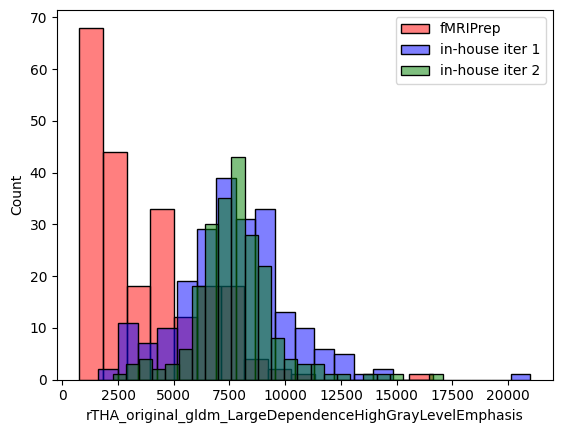

lGPi_original_glcm_Correlation
Corr 0.36982504283460804


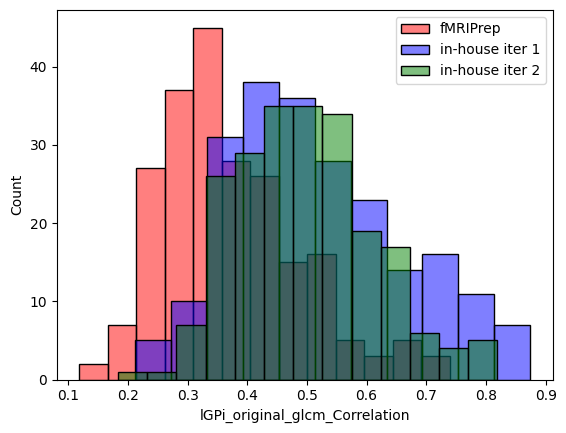

rCAU_original_glszm_LargeAreaHighGrayLevelEmphasis
Corr 0.1670441319968668


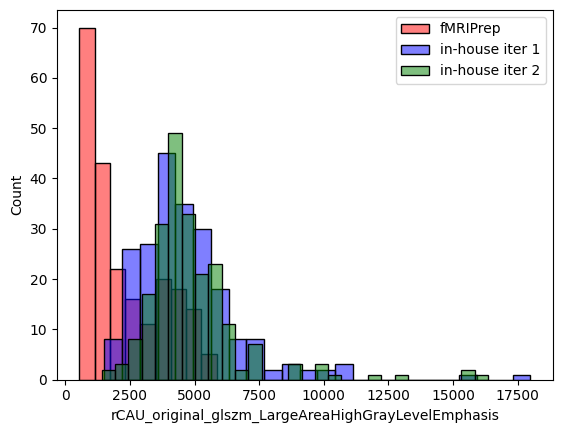

rCAU_original_glcm_Idn
Corr 0.014445097338012825


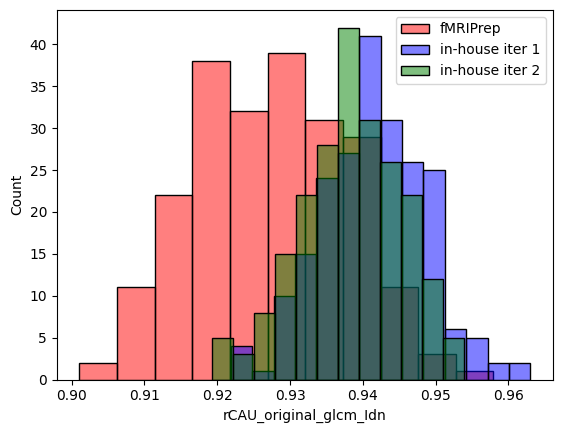

In [4]:
cols = [
    'rTHA_original_gldm_LargeDependenceHighGrayLevelEmphasis',
    'lGPi_original_glcm_Correlation',
    'rCAU_original_glszm_LargeAreaHighGrayLevelEmphasis',
    'rCAU_original_glcm_Idn'
    ]
for col in cols:
    print(col)
    print('Corr', nxt_radiomics[col].corr(pre_radiomics[col]))
    sns.histplot(nxt_radiomics[col], color='red', alpha=0.5)
    sns.histplot(pre_radiomics[col], color='blue', alpha=0.5)
    sns.histplot(bck_radiomics[col], color='green', alpha=0.5)
    plt.legend(['fMRIPrep', 'in-house iter 1', 'in-house iter 2'])
    plt.show()

rTHA_original_gldm_LargeDependenceHighGrayLevelEmphasis
pvalue 0.00031244206200789027


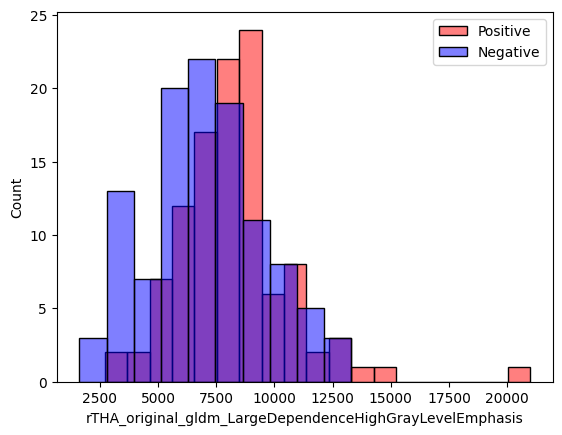

lGPi_original_glcm_Correlation
pvalue 0.22560964418018264


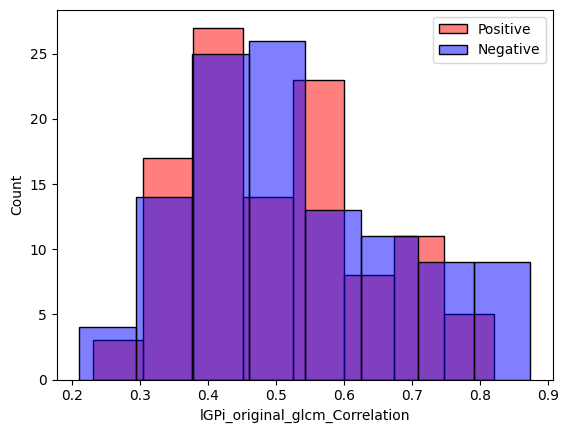

rCAU_original_glszm_LargeAreaHighGrayLevelEmphasis
pvalue 0.009826665112050492


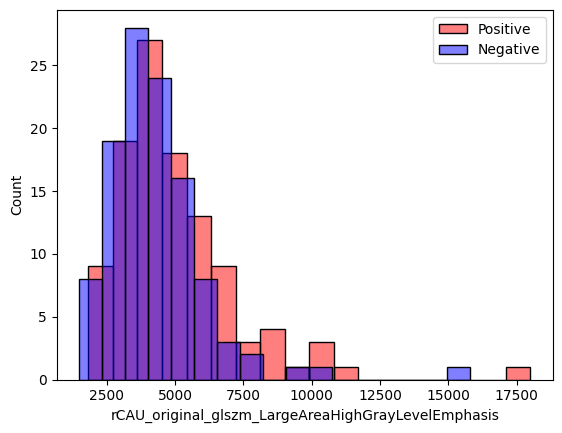

rCAU_original_glcm_Idn
pvalue 0.014349553418695643


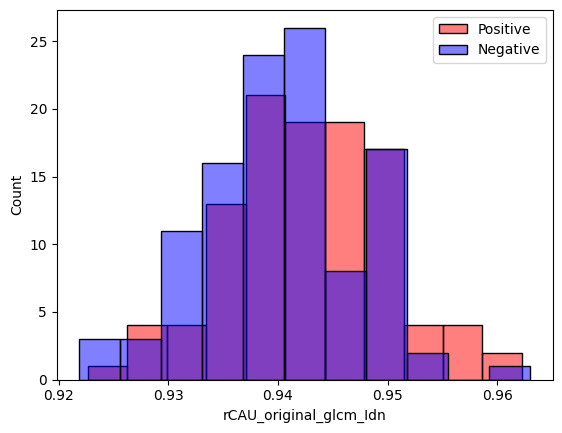

rTHA_original_gldm_LargeDependenceHighGrayLevelEmphasis
pvalue 0.6829408166912836


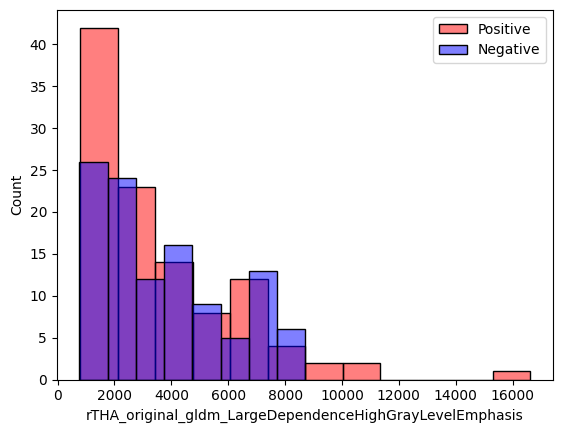

lGPi_original_glcm_Correlation
pvalue 0.7880566142542725


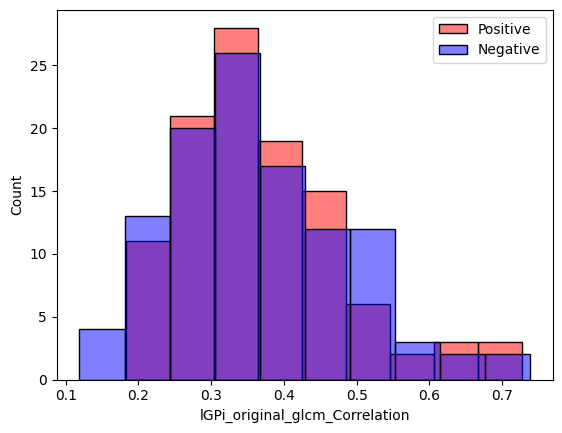

rCAU_original_glszm_LargeAreaHighGrayLevelEmphasis
pvalue 0.6391269151533507


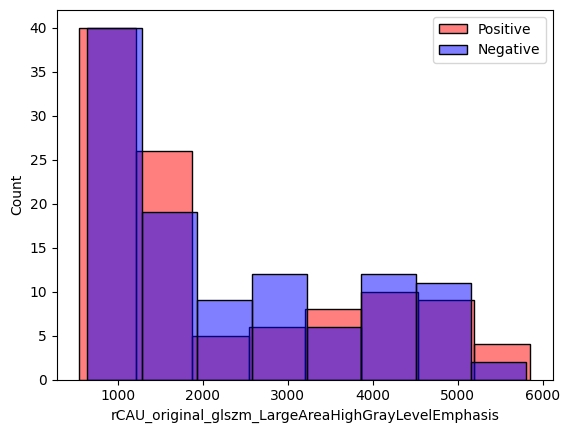

rCAU_original_glcm_Idn
pvalue 0.8972277253010112


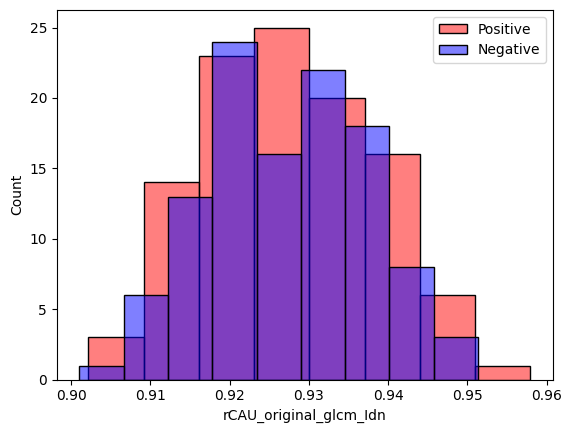

rTHA_original_gldm_LargeDependenceHighGrayLevelEmphasis
pvalue 0.0026114166564635793


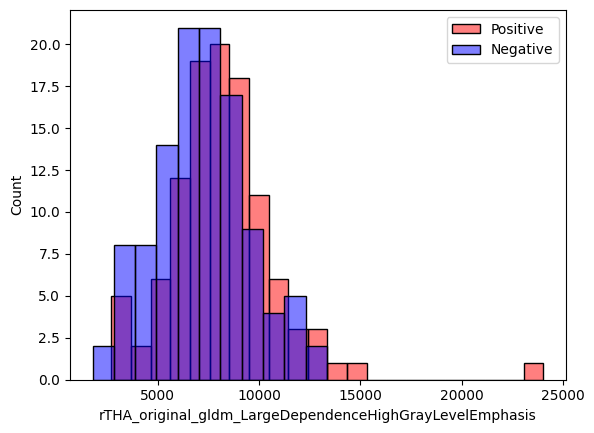

lGPi_original_glcm_Correlation
pvalue 0.5746444913458812


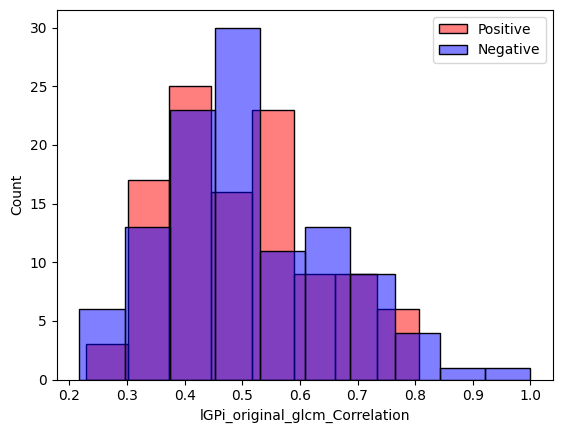

rCAU_original_glszm_LargeAreaHighGrayLevelEmphasis
pvalue 0.07225950626218501


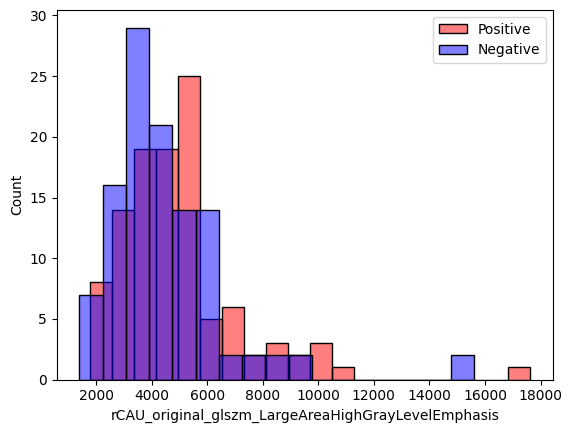

rCAU_original_glcm_Idn
pvalue 0.19974172827222034


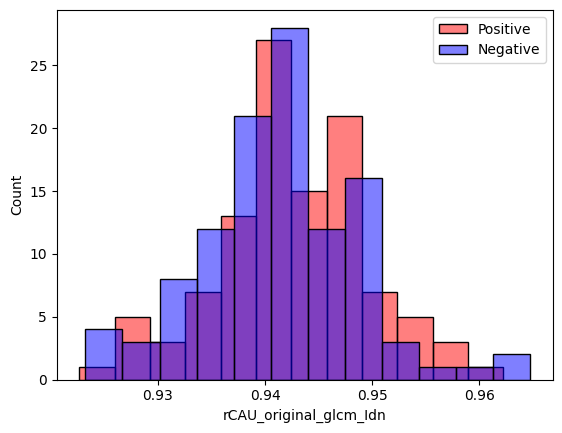

In [10]:
pre_pos = pre_radiomics.loc[data['CAT'] == 1]
pre_neg = pre_radiomics.loc[data['CAT'] == 0]
nxt_pos = nxt_radiomics.loc[data['CAT'] == 1]
nxt_neg = nxt_radiomics.loc[data['CAT'] == 0]
bck_pos = bck_radiomics.loc[data['CAT'] == 1]
bck_neg = bck_radiomics.loc[data['CAT'] == 0]
from scipy import stats
for col in cols:
    print(col)
    print('pvalue', stats.ttest_ind(pre_pos[col], pre_neg[col])[1])
    sns.histplot(pre_pos[col], color='red', alpha=0.5)
    sns.histplot(pre_neg[col], color='blue', alpha=0.5)
    plt.legend(['Positive', 'Negative'])
    plt.show()
for col in cols:
    print(col)
    print('pvalue', stats.ttest_ind(nxt_pos[col], nxt_neg[col])[1])
    sns.histplot(nxt_pos[col], color='red', alpha=0.5)
    sns.histplot(nxt_neg[col], color='blue', alpha=0.5)
    plt.legend(['Positive', 'Negative'])
    plt.show()
for col in cols:
    print(col)
    print('pvalue', stats.ttest_ind(bck_pos[col], bck_neg[col])[1])
    sns.histplot(bck_pos[col], color='red', alpha=0.5)
    sns.histplot(bck_neg[col], color='blue', alpha=0.5)
    plt.legend(['Positive', 'Negative'])
    plt.show()

In [5]:
cols = pre_radiomics.columns
cols = [col for col in cols if 'KEY' not in col]
mean_corr = []
for col in cols:
    print(col)
    cor = nxt_radiomics[col].corr(pre_radiomics[col])
    print('Corr', cor)
    cor = pre_radiomics[col].corr(bck_radiomics[col])
    print('Corr', cor)
    mean_corr.append(cor)
print('Mean corr', sum(mean_corr) / len(mean_corr))

lRN_original_firstorder_10Percentile
Corr -0.09008831415846996
Corr 0.20491443169028645
lRN_original_firstorder_90Percentile
Corr -0.022031627695204295
Corr 0.30828161545660565
lRN_original_firstorder_Energy
Corr -0.0806195122390741
Corr 0.281926601552299
lRN_original_firstorder_Entropy
Corr 0.3410511368760183
Corr 0.3138125117171628
lRN_original_firstorder_InterquartileRange
Corr 0.1495126597475718
Corr 0.05120581394094309
lRN_original_firstorder_Kurtosis
Corr 0.22112862865093735
Corr 0.5509401724272649
lRN_original_firstorder_Maximum
Corr 0.13354125257355162
Corr 0.28350683694915385
lRN_original_firstorder_MeanAbsoluteDeviation
Corr 0.15688483594781386
Corr 0.028479734850689997
lRN_original_firstorder_Mean
Corr -0.08182887525727434
Corr 0.25241896694820803
lRN_original_firstorder_Median
Corr -0.07322378604106808
Corr 0.25633203773135393
lRN_original_firstorder_Minimum
Corr -0.0856492897418531
Corr 0.06232530102142852
lRN_original_firstorder_Range
Corr 0.1394211945043025
Corr 0.098794

In [6]:
for col in cols:
    print(col)
    print('Pre', pre_radiomics[col].var())
    print('Nxt', nxt_radiomics[col].var())
    print('Bck', bck_radiomics[col].var())

lRN_original_firstorder_10Percentile
Pre 7670.809706001796
Nxt 104.14818511029293
Bck 432.9571256784282
lRN_original_firstorder_90Percentile
Pre 3280.226655743343
Nxt 157.50113626795644
Bck 639.8935377178177
lRN_original_firstorder_Energy
Pre 376921503345705.2
Nxt 9803191053666.955
Bck 37741992494024.46
lRN_original_firstorder_Entropy
Pre 0.5792827143909116
Nxt 0.10602281713406495
Bck 0.15715910801841818
lRN_original_firstorder_InterquartileRange
Pre 845.3376473049614
Nxt 25.869061531167564
Bck 16.86201053221899
lRN_original_firstorder_Kurtosis
Pre 1.8734163970205064
Nxt 0.12701157017121786
Bck 7.5072611781678225
lRN_original_firstorder_Maximum
Pre 3119.9908089633564
Nxt 321.91603601934446
Bck 816.6048069790025
lRN_original_firstorder_MeanAbsoluteDeviation
Pre 246.13559444952062
Nxt 8.831803848195904
Bck 7.352917968871962
lRN_original_firstorder_Mean
Pre 5110.48952452447
Nxt 106.1896601204144
Bck 528.8888247494509
lRN_original_firstorder_Median
Pre 5423.7940943818785
Nxt 108.2984891228

In [ ]:
#compare variance of 3 sets
for col in cols:
    print(col)
    sns.histplot(pre_radiomics[col], color='red', alpha=0.5)
    sns.histplot(nxt_radiomics[col], color='blue', alpha=0.5)
    sns.histplot(bck_radiomics[col], color='green', alpha=0.5)
    plt.show()